# Theoretischer Hintergrund
Datensätze, welche in Cluster eingeteilt wurden, können mit Hilfe von Diagrammen übersichtlich und strukturiert dargestellt werden. In diesem Kapitel werden wir speziell auf die Visualisierung vom gruppierten Daten mithilfe von Dendrogrammen und die Darstellung von Daten durch Heatmaps eingehen.
Zu Beginn werden der Nutzen und die Anwendungsgebiete von Dendrogrammen sowie Heatmaps erläutert. Dann wird die Umsetzung der Diagramme in Python dargestellt. Als Grundlage dieser Visualisierungsarten dient das Notebook zum Thema "Clustering". Die Thematik der hierarchischen Clusteranalyse wird, als Grundvoraussetzung für diese Visualisierungsmethoden, nochmals kurz aufgegriffen.

# Das Dendrogramm

## Nutzen und Anwendungsgebiete von Dendrogrammen

Ein Dendrogramm ist eine grafische Darstellung von Daten in einer baumähnlichen Struktur, welche Beziehungen zwischen Clustern darstellt. Eine wichtige Rolle spielt hierbei die Distanz der einzelnen Objekte und Cluster zueinander, weil diese Abstände als Grundlage für die Clusterbildung gelten.

![alt text](dendrogram.png "Beispiel für ein Dendrogramm")

Als Grundlage für ein Dendrogramm dient die vorausgegangene **hierarchische Clusteranalyse**. Cluster bestehen hierbei aus Objekten, die zueinander eine geringere oder größere Distanz aufweisen als zu den Objekten anderer Cluster. Man kann die Verfahren in dieser Familie nach den verwendeten Distanzmaßen und ihrer Berechnungsvorschrift unterscheiden.

Untergliedert man nach der Berechnungsvorschrift, so unterscheidet man zwei wichtige Typen von Verfahren:
- die **divisiven Clusterverfahren**, in denen zunächst alle Objekte zu einem Cluster gehören und dieses große Cluster schrittweise in immer kleine Cluster aufgeteilt wird bis jedes Cluster nur noch aus einem Objekt besteht (auch bezeichnet als „Top-down-Verfahren“)
- die **agglomerativen Clusterverfahren**, in denen zunächst jedes Objekt als ein Cluster angesehen wird und dann schrittweise mit anderen Clustern verschmolzen werden, um am Ende ein großes Cluster zu ergeben (auch bezeichnet als „Bottom-up-Verfahren“)

Für beide Verfahren gilt, dass einmal gebildete Cluster nicht mehr verändert werden können. Die Struktur wird entweder stets nur verfeinert („divisiv“) oder nur vergröbert („agglomerativ“), so dass eine strikte Cluster-Hierarchie entsteht. An der entstandenen Hierarchie kann man nicht mehr erkennen, wie sie berechnet wurde.


# Die Heatmap

## Nutzen und Anwendungsgebiete von Heatmaps

Mit Hilfe einer Heatmap können dreidimensionale Daten zweidimensional graphisch dargestellt werden. Große Datenmengen können dadurf farblich intuitiv begreiflich gemacht werden.

Heatmaps finden sich in verschiedenen Anwendungsgebieten wieder. Das bekannteste und wahrscheinlich auch älteste Anwendungsgebiet sind Hitzekarten: Hierbei werden die Temperaturverteilungen innerhalb einer Landkarte dargestellt. Weitere Anwendungsmöglichkeiten können [auf dieser Seite](https://de.wikipedia.org/wiki/Heatmap#Varianten) begutachtet werden.

![alt text](HeatMap.jpg "Beispiel für eine Heatmap: Hitzekarte")

Jedoch wird der Begriff **Heatmaps** heutzutage ebenfalls stark im Online-Marketing verwendet, um das Nutzerverhalten sowie den Aufbau von Websiten zu analysieren. Hierbei können u.a. die Augen- oder Mausbewegungen eines Nutzers auf einer Webseite erfasst und somit sein Wahrnehmungsvermögen analysiert werden. Die daraus resultierenden Informationen können z.B. dabei helfen Navigierungsabläufe zu optimieren.
>Genaueres hierzu kann auf der Seite [Was sind Heatmaps und was bringen sie?](http://www.selbstaendig-im-netz.de/2013/01/10/usability/was-sind-heatmaps-und-was-bringen-sie-teil-1-der-heatmap-serie/) von Peer Wandiger nachgelesen werden.

# Praktischer Hintergrund

## Dendrogramme (für Clustering)

### Dendrogramm mit SciPy
Für die hierarchische Gruppierung und zur Darstellung unseres Dendrogramms wollen wir die Python-Bibliothek [SciPy](https://www.scipy.org/scipylib/index.html) verwenden, welche u.a. die benötigten Bibliotheken Matplotlip, Numpy und Dendrogram enthält. Zusätzlich enhält SciPy numerische Algorithmen und mathematische Werkzeuge, die einen Kernbestandteil der `scipy` -Umgebung bilden.

Um die Erstellung von Dendrogrammen mit Python zu ermöglichen, müssen die unten aufgeführten Pakete importiert werden. 

In [2]:
from scipy.cluster import hierarchy
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

>- **Numpy** ist eine Python-Bibliothek, die den Umgang mit Datenpunkten enorm vereinfacht:
    - Grunddatentyp: das Array
    - kann man sich als effizientere Liste vorstellen
    - Idee: Man kann ein Array ähnlich wie eine Zahl verwenden. Operationen werden dann auf allen Elementen ausgeführt
>
>
>- **SciPy** baut auf Numpy auf:
 - kann numerisch integrieren, DGLs lösen, optimieren, minimieren, …
 - enthält auch physikalische Konstanten und wichtige mathematische Funktionen
>
>
>- **Matplotlib** ist eine Programmbibliothek (für Python) die es erlaubt mathematische Darstellungen aller Art anzufertigen

### Generierung der Beispieldaten

Hier werden die Daten eingelesen, aus denen wir ein Dendrogramm erstellen wollen. Die Werte selbst sind zufällig gewählt und dienen keinem speziellem Zweck. Sie werden als 2 Arrays (X und Y-Daten) mit je 7 Werten erfasst. 
In der Zeile:
```Python
Z = plt.plot(data_x, data_y, 'bo')
```
werden diese Arrays zusammen geplottet (``'bo'`` steht für 'blaue Kreise') um gleich darauf in einem Punkte-Diagramm ausgegeben zu werden:

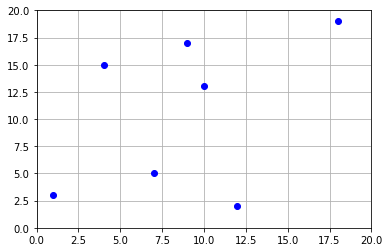

In [3]:
# Einen x-y-Plot erstellen:
data_x = [10,12,1,4,18,7,9]
data_y = [13,2,3,15,19,5,17]
Z = plt.plot(data_x, data_y, 'bo')

# Achsen-Bereiche manuell festlegen
# Syntax: plt.axis([xmin, xmax, ymin, ymax])
plt.axis([0, 20, 0, 20])

# Ein gepunktetes Diagramm-Gitter einblenden:
plt.grid(True)

# Diagramm anzeigen:
plt.show()

Um unser Beispiel nachvollziehbar zu halten bestehen unsere Daten aus 7 einfachen und verständlichen X- und Y-Koordinaten. Diese werden im oben abgebildeten Punkte-Diagramm dargestellt (Skala der X- und Y-Achse 0 bis 20).

### Hierarchische Anordnung der Cluster

Der entscheidende Schritt für den hierarchischen agglomerierenden Algorithmus ist die Auswahl der zu verschmelzenden Cluster. 

Zu unterscheidende Abstandsbegriffe:
- kürzester Abstand zwischen den Punkten aus zwei Clustern (**Single Link**)
- größter Abstand zwischen den Punkten aus zwei Clustern (**Complete Link**)
- durchschnittlicher Abstand zwischen den Punkten aus zwei Clustern (**Average Link**)

> Weitere `linkage`-Methoden und deren Verwendung können auf der [SciPy linkage docs ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) - Seite nachgelesen werden.

Nun erstellen wir die hierarchische Gruppierung aufgrund unserer eben generierten Beispieldaten:

In [4]:
 # Workaround um aus unseren beiden eindimensionalen Arrays ein 2D-Array zu erhalten
array_2d = np.array([list(points) for points in zip(data_x, data_y)])

# Verwendung der single-Methode zur hierarchischen Ordnung der Datenpunkte des Arrays array_2d
Z = hierarchy.linkage(array_2d, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)

>Für die `single` Methode wird der Abstand von allen Punkten des einen Clusters zu allen Punkten des anderen Clusters berechnet. Der kleinste Abstand zwischen zwei Punkten aus den verschiedenen Clustern wird dann als Abstand der Cluster gewählt. Der Abstand zwischen den Clustern A und B bestimmt sich damit durch die Formel:
$$
\mathcal{D}_{single-linkage}{(A,B)} := \min_{a\in A, b\in B}\{d(a,b)\}
$$
Diese Methode erstellt eine neue Liste `Z`, in der die hierarchisch geordneten Cluster aufgelistet werden.

Egal welche `method` oder `metric` wir hierbei benutzen,  die `linkage()`-Funktion verwendet sie dazu, um die Abstände eines jeden Clusters zu berechnen (wobei jeder einzelne Datenpunkt ein Cluster darstellt). Im weiteren Verlauf werden immer jene zwei Cluster zusammengeführt die, nach der gewählten Methode, immer den kleinsten Abstand zueinander haben. 
Werfen wir z.B. einen Blick auf die beiden Punkte, die zu allerst zusammengeführt wurden:

In [5]:
Z[0]

array([ 0.        ,  6.        ,  4.12310563,  2.        ])

Wir können sehen, dass jede Zeile des resultierenden Arrays das Format `[idx1, idx2, dist, sample_count]` hat. Im ersten Durchlauf verschmolz der `linkage()`-Algorithmus, die beiden Cluster mit den Indexen **0** und **6** zu einem neuen Cluster, da sie den geringsten Abstand von 4,12 hatten. Dieses neue Cluster (Index 7) enthält nun die beiden Kind-Cluster mit den Indexe 0 und 6.

Zu Beginn des Sortiervorganges bestanden unsere Beispieldaten aus 7 Clustern (7 Datenpunkten). Da jeder einzelne Datenpunkt als Cluster angesehen wurde, besetzten diese bereits zu Beginn des Ordnungsverfahrens die Indexe 0 bis 6 der zu erstellenden Liste `Z`. Weiter folgend, da der Algorithmus beginnt einzelne Cluster zu neuen Clustern zu verbinden wird jede neue Verbindung in unser Array `Z` neu eingetragen und hochgezählt:
- `Z[0]` entspricht dabei dem Index 7
- `Z[1]` entpricht dem Index 8
- `Z[2]` entpricht dem Index 9
- u.s.w.

Wenn wir uns nun alle Durchläufe des Algorithmus anschauen, können wir z.B. sehen, dass der Abstandswert der gruppierten Cluster kontinuierlich steigt und das im 2. Durchgang bereits ein Cluster aus 3 Werten geschlossen wurde:

In [6]:
Z[:] # Alle Schritte des hierarchischen Clusterverfahrens ausgeben

array([[  0.        ,   6.        ,   4.12310563,   2.        ],
       [  3.        ,   7.        ,   5.38516481,   3.        ],
       [  1.        ,   5.        ,   5.83095189,   2.        ],
       [  2.        ,   9.        ,   6.32455532,   3.        ],
       [  8.        ,  10.        ,   8.54400375,   6.        ],
       [  4.        ,  11.        ,   9.21954446,   7.        ]])

In diesem 2. Durchlauf werden die Cluster mit den Indexen 3 und 7 zusammengefüht. Aus den vorangegangen Beispiel wissen wir noch, dass der Index 7 erst im 1. Durchlauf des Algorithmus aus den Indexen 0 und 6 gebildet wurde. Hier erhalten wir also das erste Cluster welches aus 3 Indexen besteht `array_2d[0, 6, 3]`. Wenn wir uns diese Datenpunkte anzeigen lassen, sehen wir wie nah sie beieinander liegen (rot dargestellt):

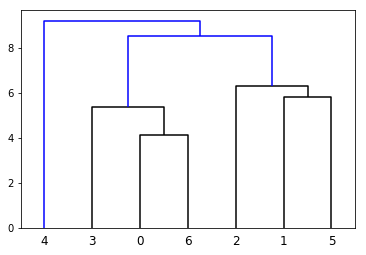

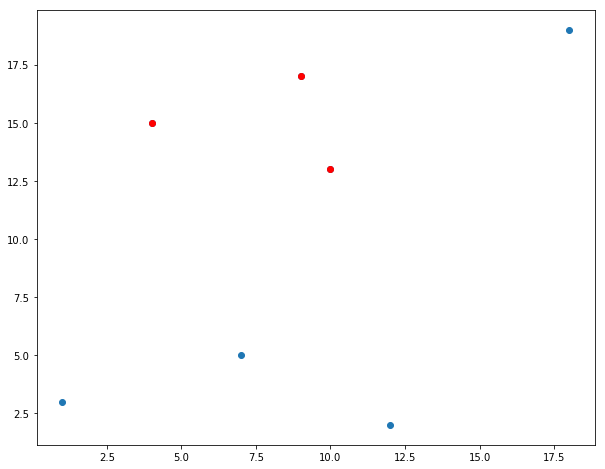

In [7]:
# Dies sind die ersten 3 Punkte, die im 1. und 2. Schritt verschmolzen wurden
idxs = [0, 6, 3] 
plt.figure(figsize=(10, 8))
plt.scatter(array_2d[:,0], array_2d[:,1])  # Alle Punkte anzeigen
plt.scatter(array_2d[idxs,0], array_2d[idxs,1], c='r')  # Interessante Punkte nochmals in rot anzeigen
plt.show()

Bis hierhin haben wir gelernt wie Cluster hierarchisch strukturiert werden. Im nachfolgenden Abschnitt werden wir daraus ein Dendrogramm erstellen.

### Visualisierung in einem Dendrogramm

Folgende Parameter sind für die Erstellung eines Dendrogramms gegeben:

```python
scipy.cluster.hierarchy.dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='b')
```

>Eine übersichtlichen Erklärung der Einstellungs- und Darstellungsfunktionen kann auf der [SciPy dendrogram docs](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html) - Seite nachgeschlagen werden. Parameter, welche nicht deklariert werden, werden automatisch mit einer `default`-Einstellung besetzt. So ist es möglich ein Dendrogramm sowohl sehr simpel als auch sehr komplex darzustellen.


Nun ist es an der Zeit ein Dendrogramm anhand unserer, bereits geclusterten Daten, zu erstellen. Aus Lernzwecken verwenden wir eine relativ einfache und schlichte Darstellungsweise:

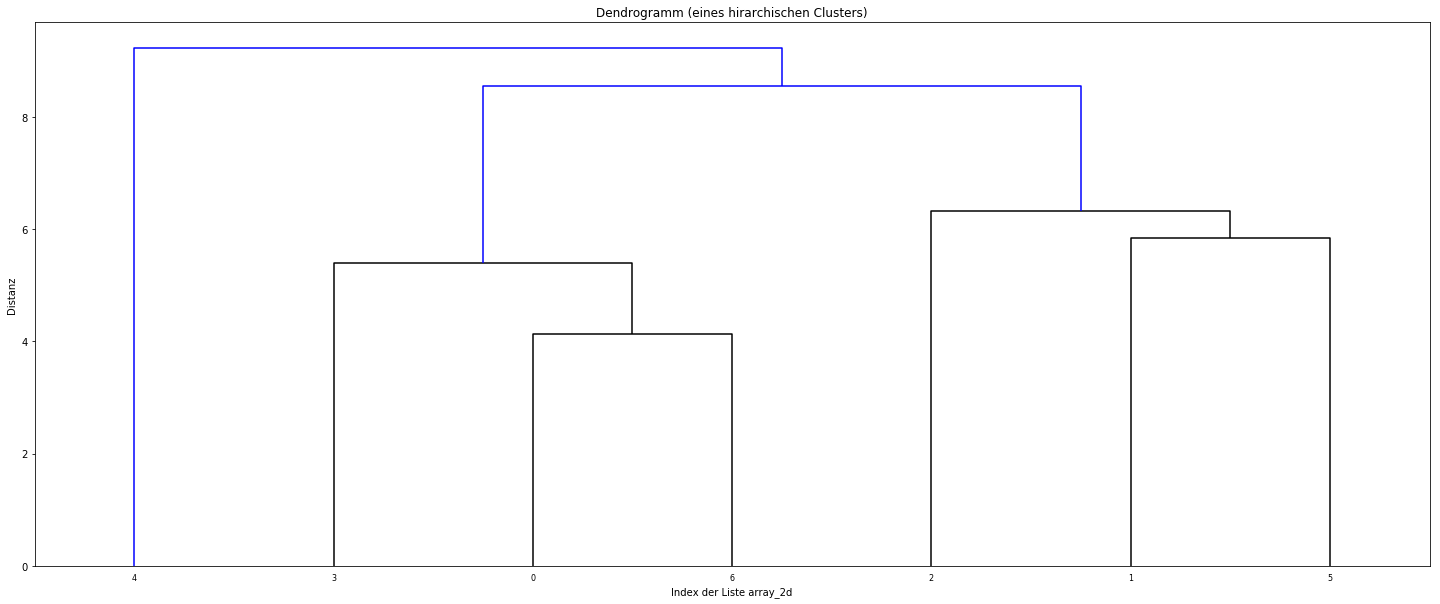

In [8]:
# Hier wird das gesamte Dendrogramm unserer Beispieldaten geplottet
plt.figure(figsize=(25, 10))

# Titel der Dendrogramms
plt.title('Dendrogramm (eines hirarchischen Clusters)') 

# Beschriftung der X-Achse
plt.xlabel('Index der Liste array_2d')

# Beschriftung der Y-Achse
plt.ylabel('Distanz')

# Plotten des Dendrogramms
dendrogram(
    Z,
    leaf_font_size=8.,  # Schriftgröße der X-Achsen-Beschriftung
)

# Anzeigen
plt.show()

Auf den ersten Blick kann ein solchen Dendrogramm sehr komplex wirken. Jedoch ist es bei näherer Betrachtung gut nachvollziebar:
- auf der x-Achse werden die einzelnen Aushangspunkte (die Liste `array_2d` mit den Datenpunkten 1 bis 7 anhand der Indexe 0 bis 6)
- auf der y-Achse werden die Distanzen (in unserem Fall die Ergebnisse der `'single'`-Methode) dargestellt

Bei einem solchen Dendrogramm besteht nun die Möglichkeit, ausgehend von einem Datenpunkt auf der X-Achse, den zugehörigen nächsten Partnerwert ausfindig zu machen indem wir dem umgekehrten "U" folgen. Die jeweiligen horizontalen Linien geben die Distanz zwischen den verschmolzenen Partner an und werden anhand der Y-Achse abgelesen.

Das nachfolgende Dendrogramm zeigt unsere Daten aus einer horizontalen Perspektive und einer anderen Farbgebung:

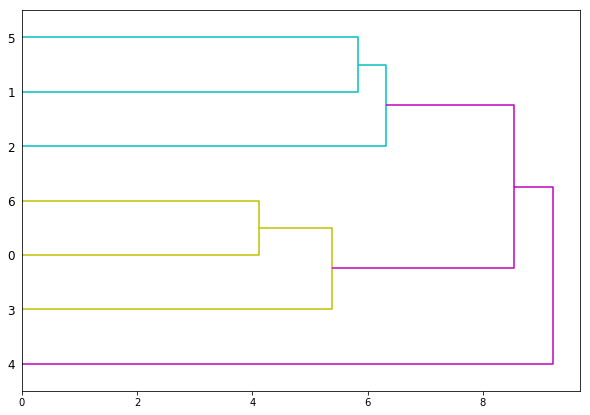

In [9]:
# Benutzerdefinierte Farbpaletten können im Vorfeld bestimmt werden
hierarchy.set_link_color_palette(['y', 'c', 'm', 'k'])

plt.figure(figsize=(10, 7))
dn = hierarchy.dendrogram(Z, above_threshold_color='m',
                           orientation='right')

# Setzt nach Verwendung der Farben alles wieder auf Standard zurück (blau)
hierarchy.set_link_color_palette(None)
plt.show()

>Parametererklärung:
- `above_threshold_color` (String wird erwartet z.B. 'r' (red); freiwilliger Parameter):
Diese `Matplotlib`-Farbzeichenfolge setzt die Farbe der Links über dem color_threshold. Die Standartfarbe bei nicht-Vergabe des Parameters ist 'b' (blue). 
    - In diesem Beispiel wurde die Farbe Magenta als Startfarbe gegeben (angegebene Farbennutzung, der vordefinierten Farbpalette, von rechts nach links)
- `orientation` (String wird erwartet z.B. '`top`' (oben); freiwilliger Parameter): Gibt die Richtung an, in die das Dendrogramm gezeichnet werden soll. Weiter Möglichkeiten: `bottom`, `left`, `right`.

## Heat Maps
Heatmaps können eine sehr aufschlussreiche Darstellungsart von Daten sein, vorausgesetzt die Art der erhoben Daten (z.B. Temperaturen, DNA-Sequenzen) eignen sich zum erstellen einer Heatmap. In den folgenden Abschnitten werden wir grundlegende Schritte der Heatpmap-Erstellung kennen lernen. 

### Heatmaps mit Plotly

Um an die, zur Ausführung notwenige Library zu kommen müssen wir in der Windows Kommandozeile den Befehl **`pip install plotly`** ausführen. Dieser Befehl sorgt dafür, dass die `plotly`-Library lokal installiert und verwendet werden kann. Es besteht die Möglichkeit, sich einen Account auf der Plotly-Seite anzulegen oder, so wie in diesem Notebook, die Library offline zu nutzen.
Weitere Infomationen können auf der [Plotly](https://plot.ly/python/offline/)-Seite nachgelesen werden (vorallem in Bezug auf die offline-Nutzung).

Die Diagramme, die Ploty zur Verfügung stellt, sind deklarativ durch Objekte in `plotly.graph_objs` beschrieben.
Jeder Aspekt eines Plotly-Diagramms (die Farbe, Gitter, Daten, usw.) besitzt im jeweiligen Objekt ein entsprechendes Schlüsselattribut.
In `plotly.figure_factory` sind zusätzliche Funktionen enthalten wie z.B. zur Beschriftung der einzelnen Felder.

Plotly bietet die Möglichkeit einzelne Grafiken zu exportieren und online zu bearbeiten (die zusätzliche Bearbeitung auf der `plot.ly` - Seite ist sehr einfach und sprechend aufgebaut).

> Eine Übersicht über alle möglichen Attribute einer Heatmap bietet die [Plotly Python chart attribut reference](https://plot.ly/python/reference/#heatmap).

Um die Erstellung von Heatmaps mit Python zu ermöglichen, müssen die unten aufgeführten Pakete importiert werden.

In [10]:
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff # Ermöglicht die Beschriftung der Heatmaps

# Offline Nutzung der Plotly-Library, kein Account notwendig
py.offline.init_notebook_mode(connected=True) 

### Eine einfache Heatmap

Nachfolgend sehen wir eine ganz einfache Heatmap:

In [11]:
# Einlesen der Beispieldaten (Array)
simpleHeatmap = go.Heatmap(z=[[1, 20, 30],
                              [33, 1, 60],
                              [40, 60, 1]]) 
data=[simpleHeatmap]

# Notwenig um die Heatmap offline darzustellen
py.offline.iplot(data, filename='Einfache Heatmap')

In unserem ersten Beispiel sehen wir, dass jeder eingelesene Wert als ein Farbfeld dargestellt wird. Da bei dieser einfachen Heatmap keine Argumente oder Attribute deklaiert wurden, wird das Grafikobjekt nach Standardeinstellung erstellt (so ist z.B. die Farbgebung rot zu blau als Standard definert, falls keine anderen Angaben gemacht wurden). Rechts sehen wir die vorgegebene Farbskala. Hier kann abgelesen werden welche Farbe welcher Wert erhält. Das Diagramm wird zu den Daten horizontal gespiegelt dargestellt so ist der Wert 30 im Diagramm rechts unten abgebildet (graues Feld). Indem wir mit dem Cursor über die einzelnen Felder der Heatmap fahren, werden uns die einzelen Daten nochmals angezeigt.

### Heatmaps mit Beschriftungen

#### Anzeige der einzelnen Werte
Durch Farbgebungen und deren Anordnung ist eine Heatmap sehr Aussagekräftig. Es besteht jedoch oft die Notwenigkeit auch die eingelesenen Werte darzustellen. Im nachfolgenden Beispiel werden mit Hilfe des Befehls `create_annotated_heatmap` die zugehörigen Werte im jeweiligen Farbfeld dargestellt:

In [12]:
# Einlesen der Beispieldaten eines 5-dimensionalen Arrays
z = [[.1, .3, .5, .7, .9],  
     [1, .8, .6, .4, .2],
     [.2, 0, .5, .7, .9],  
     [.9, .8, .4, .2, 0],
     [.3, .4, .5, .7, 1]] 

# Mit diesem Befehl werden die farblich dargestellten Werte zusätzlich im Feld angezeigt
fig = ff.create_annotated_heatmap(z, colorscale='Rainbow')

py.offline.iplot(fig, filename='Heatmap mit Wert-Anzeige')

In diesem Beispiel hat jedes Feld seinen Wert als Beschriftung erhalten. 

>Parametererklärung:
- `colorscale`: Legt die Farbfläche fest. Die `colorscale` muss ein Array sein, dafür ist es erforderlich einen niedrigsten (0) und einen höchsten (1) Wert zu vergeben. Als Alternative existieren vordefinierte Farbpaletten, die hier ebenfalls benutzt werden können wie z.B. 'Rainbow' (s.o.)

#### Beschriftung der Achsen

Die Achsenbeschriftung erleichtert die Interpretation einer Heatmap. Im folgenden Beispiel geht es um die Spielstände von 3 Teams (Team A, B und C) und deren Ergebnis nach 3 geleisteten Spielen:

In [13]:
# Einlesen der Werte
z = [[.1, .5, 1.0],  
     [1.0, .1, .1],
     [.1, .5, .5]]

# kategorische Beschriftung der X-Achse
x = ['Team A', 'Team B', 'Team C'] 

# kategorische Beschriftung der Y-Achse
y = ['Game Three', 'Game Two', 'Game One'] 

# Beschriftung der einzelnen Farbfelder
z_text = [['Win', 'Ud.', 'Lose'],  
          ['Lose', 'Win', 'Win'],
          ['Win', 'Ud.', 'Ud.']]

# Hier wird die Farbscala durch den Farb-Hexa-Code festgelegt:
# ->Beginn bei 0 = grün und endet bei 1 = grau
colorscale = [[0, '#7CFC00'], [1, '#878787']] 
                                       
# Heatmap wird aus den Daten und unter Berücksichtigung der deklarierten Parameter geplottet
fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text,colorscale=colorscale)
py.offline.iplot(fig, filename='annotated_heatmap_text')

In dieser zweiten Heatmap haben wir den Achsen eine Beschriftung mitgegeben. Dadurch ist es möglich diese wie eine Art Tabelle zu lesen.

Die Erstellung komplexer Diagramme ist mit Python also kein Problem. Durch die große Anzahl an zur Verfügung stehenden Libraries vereinfachen sie es dem Nutzer in einfacher Syntax komplexe Diagramme zu plotten. Durch die vielen Einstellungsmöglichkeiten sind sie außerdem sehr vielfältig einsetzbar.


### Quellen:
**Quellen in Bezug auf die Thematik Dendrogramme:**
- __https://www-m9.ma.tum.de/material/felix-klein/clustering/Methoden/Hierarchisches_Clustern.php__
- __https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/__
- __https://de.wikipedia.org/wiki/Hierarchische_Clusteranalyse__

**Quellen in Bezug auf die Thematik Heatmaps:**
- __https://plot.ly/python/heatmaps/__
- __http://nbviewer.jupyter.org/github/rasbt/pattern_classification/blob/master/clustering/hierarchical/clust_complete_linkage.ipynb__
- __https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set__